In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data - data covered years weekly prices from 2003 and 2019. The heading rows are in the second and third rows 
Fuel = pd.read_excel('Weekly_Fuel_Prices_071019.xlsx', 19, header=[1,2]) 
Fuel.columns = Fuel.columns.map(' '.join)

In [3]:
Fuel

Unnamed: 0_level_0 Date  Pump price ULSP (p/litre)  \
0                2003-06-09                  74.590284   
1                2003-06-16                  74.469143   
2                2003-06-23                  74.423566   
3                2003-06-30                  74.352421   
4                2003-07-07                  74.283737   
5                2003-07-14                  74.206577   
6                2003-07-21                  75.065240   
7                2003-07-28                  75.100855   
8                2003-08-04                  75.124384   
9                2003-08-11                  75.444516   
10               2003-08-18                  75.808948   
11               2003-08-25                  76.053011   
12               2003-09-01                  76.125860   
13               2003-09-08                  76.226190   
14               2003-09-15                  76.196425   
15               2003-09-22                  76.148709   
16               2003-09-29                  76.083990   
17               2003-10-06                  76.432933   
18               2003-10-13                  75.897528   
19               2003-10-20                  76.048060   
20               2003-10-27                  75.995460   
21               2003-11-03                  75.996259   
22               2003-11-10                  75.942830   
23               2003-11-17                  75.926843   
24               2003-11-24                  76.015098   
25               2003-12-01                  75.995276   
26               2003-12-08                  75.970566   
27               2003-12-15                  75.959063   
28               2003-12-22                  75.922636   
29               2003-12-29                  75.939699   
..                      ...                        ...   
823              2019-03-18                 120.475076   
824              2019-03-25                 120.833990   
825              2019-04-01                 121.704002   
826              2019-04-08                 122.664817   
827              2019-04-15                 124.055507   
828              2019-04-22                 125.429169   
829              2019-04-29                 126.360643   
830              2019-05-06                 127.497249   
831              2019-05-13                 127.970969   
832              2019-05-20                 128.509333   
833              2019-05-27                 129.142569   
834              2019-06-03                 129.407206   
835              2019-06-10                 128.885668   
836              2019-06-17                 127.660773   
837              2019-06-24                 126.663116   
838              2019-07-01                 126.487211   
839              2019-07-08                 126.862614   
840              2019-07-15                 127.127914   
841              2019-07-22                 127.809271   
842              2019-07-29                 128.033777   
843              2019-08-05                 128.370359   
844              2019-08-12                 128.361242   
845              2019-08-19                 128.165983   
846              2019-08-26                 128.221036   
847              2019-09-02                 127.864315   
848              2019-09-09                 127.789416   
849              2019-09-16                 126.918236   
850              2019-09-23                 126.778912   
851              2019-09-30                 126.923964   
852              2019-10-07                 126.869495   

     Diff on previous  WEEK (p/litre)  Diff on previous  YEAR (p/litre)  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                               

In [4]:
#Dropping unnamed columns = Fuel = Fuel.loc[:, ~Fuel.columns.str.contains('^Unnamed')]

Fuel= Fuel.rename({'Unnamed: 0_level_0 Date': 'Date', 'Pump price ULSP (p/litre)': 'Petrol_price', 'Pump price ULSD (p/litre)': 'Diesel_price'}, axis=1)
Fuel.head()

Date  Petrol_price  Diff on previous  WEEK (p/litre)  \
0 2003-06-09     74.590284                               NaN   
1 2003-06-16     74.469143                               NaN   
2 2003-06-23     74.423566                               NaN   
3 2003-06-30     74.352421                               NaN   
4 2003-07-07     74.283737                               NaN   

   Diff on previous  YEAR (p/litre)  Duty rate ULSP (p/litre)  \
0                               NaN                     45.82   
1                               NaN                     45.82   
2                               NaN                     45.82   
3                               NaN                     45.82   
4                               NaN                     45.82   

   VAT (% rate) ULSP  VAT (% rate) ULSP.1  VAT (% rate) ULSP.2  Diesel_price  \
0               17.5                  NaN                  NaN     76.773394   
1               17.5                  NaN                  NaN     76.689054   
2               17.5                  NaN                  NaN     76.620546   
3               17.5                  NaN                  NaN     76.505260   
4               17.5                  NaN                  NaN     76.457376   

   Diff on previous  WEEK (p/litre).1  Diff on previous  YEAR (p/litre).1  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   Duty rate ULSD (p/litre)  VAT (% rate) ULSD  VAT (% rate) ULSD.1  \
0                     45.82               17.5                  NaN   
1                     45.82               17.5                  7.0   
2                     45.82               17.5                  7.0   
3                     45.82               17.5                  7.0   
4                     45.82               17.5                  7.0   

                           VAT (% rate) ULSD.2  VAT (% rate) ULSD.3  
0                                          NaN                  NaN  
1                                   Duty Rates                  NaN  
2                               ULSP  and ULSD                  NaN  
3    Duty rate per litre (£) from 7 March 2001               0.4582  
4  Duty rate per litre (£) from 1 October 2003               0.4710

In [5]:
Fuel= Fuel.filter(items=['Date','Petrol_price'], axis = 1) 
Fuel.head()

Date  Petrol_price
0 2003-06-09     74.590284
1 2003-06-16     74.469143
2 2003-06-23     74.423566
3 2003-06-30     74.352421
4 2003-07-07     74.283737

In [6]:
Fuel.dtypes

Date            datetime64[ns]
Petrol_price           float64
dtype: object

In [7]:
#import matplotlib.dates as mdates

In [8]:
#Fuel['Date'] = pd.to_datetime(Fuel['Date'], ) generates errors as the date column has some mixed values-numeric with datetimes as such we need to convert to str first
#Fuel['Date'] = pd.to_datetime(Fuel['Date'].astype(str), errors='coerce')

In [9]:
# Fuel.dtypes

In [10]:
Fuel.set_index('Date', inplace=True)
# Fuel = Fuel.iloc[17:] # drop the first 30 value as 2003 is only half a year.
Fuel.head()

Petrol_price
Date                    
2003-06-09     74.590284
2003-06-16     74.469143
2003-06-23     74.423566
2003-06-30     74.352421
2003-07-07     74.283737

In [11]:
Fuel.describe()

Petrol_price
count    853.000000
mean     110.727579
std       18.744397
min       74.206577
25%       94.971828
50%      113.922513
75%      128.342308
max      142.172754

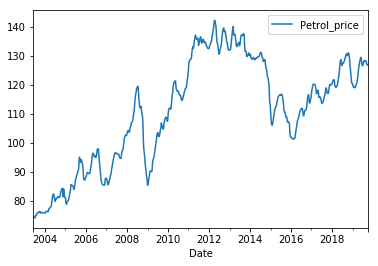

In [12]:
Fuel.plot()

In [13]:
Fuel.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2019-08-05', '2019-08-12', '2019-08-19', '2019-08-26',
               '2019-09-02', '2019-09-09', '2019-09-16', '2019-09-23',
               '2019-09-30', '2019-10-07'],
              dtype='datetime64[ns]', name='Date', length=853, freq=None)

In [14]:
Fuel_prices=Fuel.asfreq('W-MON')
#Fuel_prices.index

In [15]:
Fuel_prices.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2019-08-05', '2019-08-12', '2019-08-19', '2019-08-26',
               '2019-09-02', '2019-09-09', '2019-09-16', '2019-09-23',
               '2019-09-30', '2019-10-07'],
              dtype='datetime64[ns]', name='Date', length=853, freq='W-MON')

In [16]:
Fuel_prices.head()

Petrol_price
Date                    
2003-06-09     74.590284
2003-06-16     74.469143
2003-06-23     74.423566
2003-06-30     74.352421
2003-07-07     74.283737

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomposition = seasonal_decompose(Fuel_prices, model='multiplicative', freq=52)
#frequency is the number of data points relative to a year

In [19]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


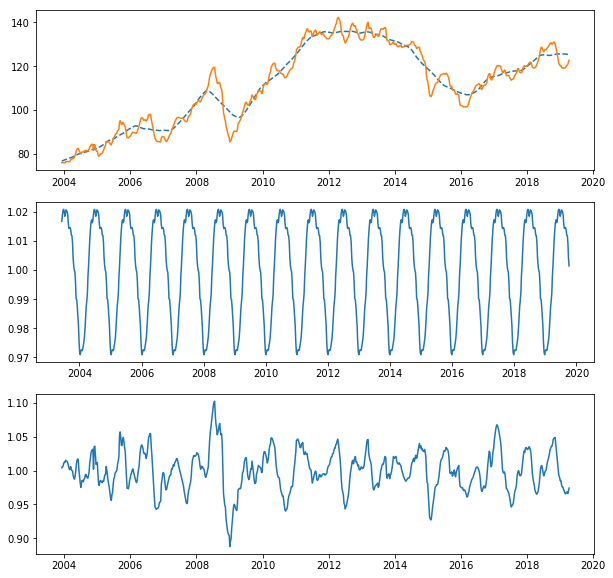

In [20]:
plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend, linestyle='--', label='Trend')
plt.plot(trend*residual*seasonal, label='Original')

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')

plt.subplot(313)
plt.plot(residual, label='Randomness')

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0, 100)

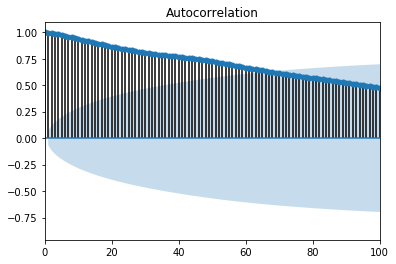

In [22]:
plot_acf(Fuel_prices)
plt.xlim(0,100)

In [23]:
diff = Fuel_prices.diff(1).dropna()

In [24]:
decomposition = seasonal_decompose(diff, model='additive', freq=52)

In [25]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

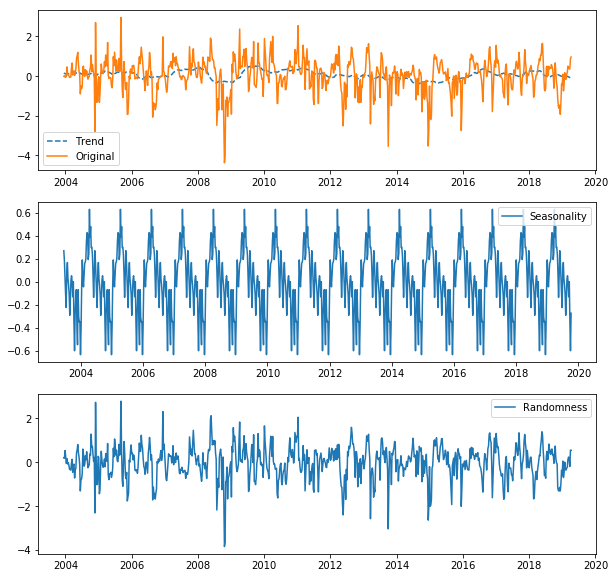

In [26]:
plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend, linestyle='--', label='Trend')
plt.plot(trend+residual+seasonal, label='Original')
plt.legend()

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(313)
plt.plot(residual, label='Randomness')
plt.legend()

### Model and transform

Testing for stationarity

This is required so that time series models can be contructed. If a time series is non-stationary then its distribution changes from time period to time period. With only one observation for each time period, it is difficult to see how one could make any inferences about the time series. It is like trying to hit a moving target knowing where it has been but with no knowledge of the direction it is moving in.

Generally - stationarity is the repeatablilty of the data where you can see the distribution is generally similar. Explicitly, there are three basic criterion for a series to be classified as stationary series: 1.The mean of the series should not be a function of time rather should be a constant. 2.The variance of the series should not a be a function of time. This property is known as homoscedasticity. 3.The covariance of the i th term and the (i + m) th term should not be a function of time. 

Dickey-Fuller test can figure out whether a time series is stationary around a mean or linear trend or is non-stationary. It will help figure out if the mean and variance are constant over time. The null hypothesis is that the data is stationary. The alternate hypothesis is that the data is non-stationary. 


In [27]:
Fuel_prices.ix[810]

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Petrol_price    121.024397
Name: 2018-12-17 00:00:00, dtype: float64

In [28]:
train = Fuel_prices[:'01-2019']
test = Fuel_prices['12-2018':]

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

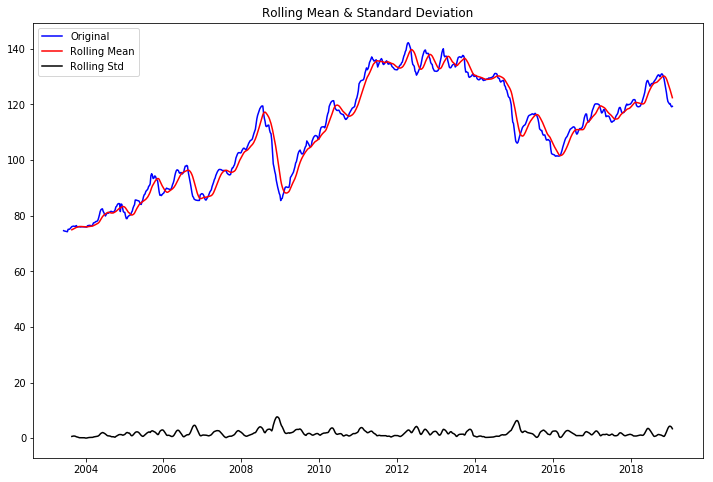

Results of Dickey-Fuller Test:
p-value = 0.2560. The series is likely non-stationary.
Test Statistic                  -2.071915
p-value                          0.255957
#Lags Used                       7.000000
Number of Observations Used    809.000000
Critical Value (1%)             -3.438459
Critical Value (5%)             -2.865119
Critical Value (10%)            -2.568676
dtype: float64


In [30]:
test_stationarity(train['Petrol_price'])

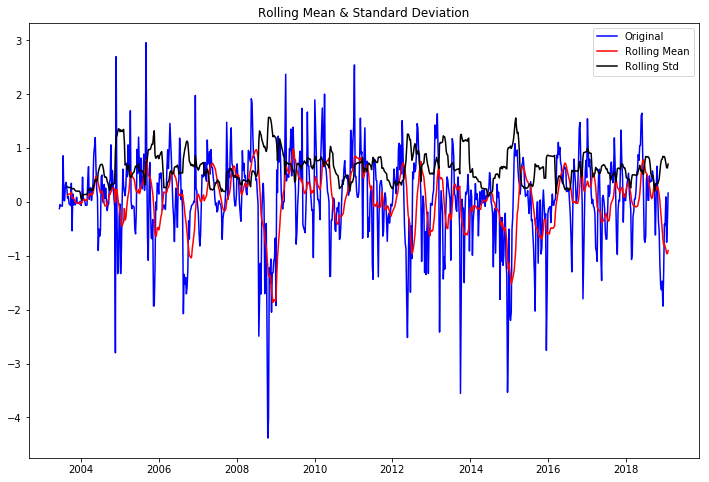

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.961438e+00
p-value                        2.941312e-12
#Lags Used                     6.000000e+00
Number of Observations Used    8.090000e+02
Critical Value (1%)           -3.438459e+00
Critical Value (5%)           -2.865119e+00
Critical Value (10%)          -2.568676e+00
dtype: float64


In [31]:
first_diff = train.Petrol_price - train.Petrol_price.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)


import itertools
import warnings

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

### Identification of best fit ARIMA model
In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly but in Python we will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.

This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

In [32]:
import itertools
import statsmodels.api as sm_sa
## Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [33]:
Fuel_prices_log = np.log10(Fuel_prices)
Fuel_prices_log.dropna(inplace=True)

### import sys
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(Fuel_prices_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}52 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}52 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [43]:
import itertools
import statsmodels.api as sm_sa
import warnings
# Define the p, d and q parameters to take any value between 0 and 4
p = d = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [45]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Fuel_prices,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [48]:
import statsmodels 
from statsmodels import api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.utils import check_array
from functools import partial
from multiprocessing import Pool
def get_aic_bic(order,series):
    aic=np.nan
    bic=np.nan
    #print(series.shape,order)
    try:
        arima_mod=statsmodels.tsa.arima_model.ARIMA(series,order=order,freq=52).fit(transparams=True,method='css')
        aic=arima_mod.aic
        bic=arima_mod.bic
        print(order,aic,bic)
    except:
        pass
    return aic,bic

def get_PDQ_parallel(Fuel_price,n_jobs=7):
    p_val=13
    q_val=13
    d_vals=2
    pdq_vals=[ (p,d,q) for p in range(p_val) for d in range(d_vals) for q in range(q_val)]
    get_aic_bic_partial=partial(get_aic_bic,series=data)
    p = Pool(n_jobs)
    res=p.map(get_aic_bic_partial, pdq_vals)  
    p.close()
    return pd.DataFrame(res,index=pdq_vals,columns=['aic','bic']) 

In [52]:
import statsmodels 
from statsmodels import api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.utils import check_array
from functools import partial
from multiprocessing import Pool
def get_aic_bic(order,series):
    aic=np.nan
    bic=np.nan
    #print(series.shape,order)
    try:
        arima_mod=statsmodels.tsa.arima_model.ARIMA(series,order=order,freq=52).fit(transparams=True,method='css')
        aic=arima_mod.aic
        bic=arima_mod.bic
        print(order,aic,bic)
    except:
        pass
    return aic,bic

def get_PDQ_parallel(data,n_jobs=7):
    p_val=13
    q_val=13
    d_vals=2
    pdq_vals=[ (p,d,q) for p in range(p_val) for d in range(d_vals) for q in range(q_val)]
    get_aic_bic_partial=partial(get_aic_bic,series=data)
    p = Pool(n_jobs)
    res=p.map(get_aic_bic_partial, pdq_vals)  
    p.close()
    return pd.DataFrame(res,index=pdq_vals,columns=['aic','bic'])

In [32]:
import warnings
# Import arima_model
from statsmodels.tsa.arima_model import ARIMA
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.95)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 6, 8, 10]
d_values = [1, 2]
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Fuel_prices.values, p_values, d_values, q_values)

ARIMA(0, 1, 0) MSE=0.385
ARIMA(0, 1, 1) MSE=0.213
ARIMA(0, 1, 2) MSE=0.172
ARIMA(0, 2, 0) MSE=0.199
ARIMA(0, 2, 1) MSE=0.210
ARIMA(0, 2, 2) MSE=0.214
ARIMA(1, 1, 0) MSE=0.156
ARIMA(1, 1, 1) MSE=0.156
ARIMA(1, 1, 2) MSE=0.158
ARIMA(1, 2, 0) MSE=0.201
ARIMA(1, 2, 1) MSE=0.160
ARIMA(1, 2, 2) MSE=0.160
ARIMA(2, 1, 0) MSE=0.156
ARIMA(2, 1, 1) MSE=0.158
ARIMA(2, 1, 2) MSE=0.159
ARIMA(2, 2, 0) MSE=0.208
ARIMA(2, 2, 1) MSE=0.160
ARIMA(3, 1, 0) MSE=0.157
ARIMA(3, 1, 1) MSE=0.159
ARIMA(3, 2, 0) MSE=0.211
ARIMA(3, 2, 1) MSE=0.161
ARIMA(3, 2, 2) MSE=0.158
ARIMA(4, 1, 0) MSE=0.160
ARIMA(4, 1, 1) MSE=0.160
ARIMA(4, 1, 2) MSE=0.155
ARIMA(4, 2, 0) MSE=0.207
ARIMA(4, 2, 1) MSE=0.163
ARIMA(4, 2, 2) MSE=0.158
ARIMA(6, 1, 0) MSE=0.154
ARIMA(6, 1, 1) MSE=0.153
ARIMA(6, 1, 2) MSE=0.153
ARIMA(6, 2, 0) MSE=0.201
ARIMA(6, 2, 1) MSE=0.158
ARIMA(8, 1, 0) MSE=0.154
ARIMA(8, 1, 1) MSE=0.153
ARIMA(8, 1, 2) MSE=0.148
ARIMA(8, 2, 0) MSE=0.196
ARIMA(8, 2, 1) MSE=0.158
ARIMA(10, 1, 0) MSE=0.153
ARIMA(10, 1, 1) MSE=0.15

### ARIMA (10, 1, 2)

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
model = SARIMAX(train, order=(10, 1, 2), seasonal_order=(1,1,0,52), enforce_invertibility=False, enforce_stationarity=False)

In [35]:
results = model.fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                        Petrol_price   No. Observations:                  817
Model:             SARIMAX(10, 2, 2)x(1, 1, 0, 52)   Log Likelihood                -787.100
Date:                             Sat, 12 Oct 2019   AIC                           1602.200
Time:                                     15:47:17   BIC                           1665.935
Sample:                                 06-09-2003   HQIC                          1626.835
                                      - 01-28-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3128      0.030    -10.358      0.000      -0.372      -0.254
ar.L2          0.6791      0.037     18.282      0.000       0.606       0.752
ar.L3         -0.0103      0.044     -0.233      0.816      -0.096       0.076
ar.L4          0.0081      0.048      0.171      0.865      -0.085       0.102
ar.L5          0.0434      0.050      0.875      0.382      -0.054       0.141
ar.L6         -0.0621      0.055     -1.120      0.263      -0.171       0.047
ar.L7       7.998e-05      0.050      0.002      0.999      -0.099       0.099
ar.L8          0.0542      0.052      1.044      0.297      -0.048       0.156
ar.L9         -0.0159      0.043     -0.369      0.712      -0.101       0.069
ar.L10        -0.0216      0.038     -0.575      0.566      -0.095       0.052
ma.L1         -0.0016      1.841     -0.001      0.999      -3.610       3.606
ma.L2         -0.9985      1.838     -0.543      0.587      -4.602       2.605
ar.S.L52      -0.4652      0.024    -19.282      0.000      -0.512      -0.418
sigma2         0.5474      1.013      0.541      0.589      -1.437       2.532
===================================================================================
Ljung-Box (Q):                       25.13   Jarque-Bera (JB):               156.97
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1]:
predict = results.predict(start= 810, end=870)
Print(predict)

NameError: name 'results' is not defined

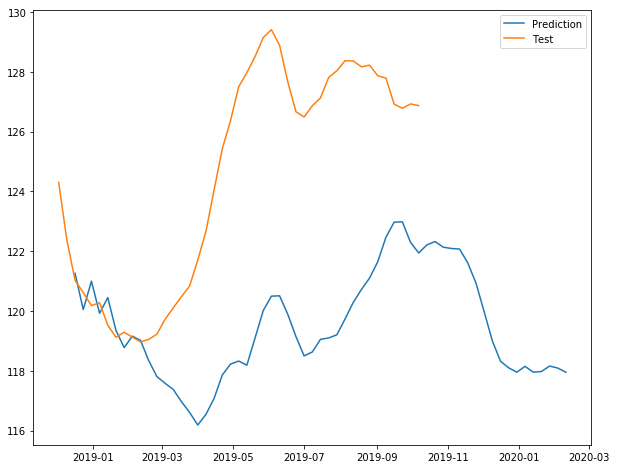

In [38]:
plt.figure(figsize=(10,8))
plt.figure(1)
plt.plot(predict, label='Prediction')
plt.plot(test, label='Test')
plt.legend()